In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

In [37]:
df = pd.read_csv('../Data/modified_data.csv')
df.shape

(569, 12)

In [38]:
df.head()

,diagnosis,radius_mean,texture_mean,smoothness_mean,compactness_mean,symmetry_mean,radius_se,texture_se,smoothness_se,compactness_se,symmetry_se,fractal_dimension_se
0,1,17.99,10.38,0.11840,0.27760,0.2419,1.0950,0.9053,0.006399,0.04904,0.03003,0.006193
1,1,20.57,17.77,0.08474,0.07864,0.1812,0.5435,0.7339,0.005225,0.01308,0.01389,0.003532
2,1,19.69,21.25,0.10960,0.15990,0.2069,0.7456,0.7869,0.006150,0.04006,0.02250,0.004571
3,1,11.42,20.38,0.14250,0.28390,0.2597,0.4956,1.1560,0.009110,0.07458,0.05963,0.009208
4,1,20.29,14.34,0.10030,0.13280,0.1809,0.7572,0.7813,0.011490,0.02461,0.01756,0.005115


## Test Train Split

In [40]:
X=df.drop(['diagnosis'],axis=1)
y = df['diagnosis']

In [41]:
X_train, X_test,y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=40) #test train split

## Feature Scaling 

In [43]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

## 1. Logistic Regression

In [45]:
model_1 = LogisticRegression()

model_1.fit(X_train_scaled, y_train)
y_pred = model_1.predict(X_test_scaled)

In [46]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[110,   5],
       [  3,  53]])

In [47]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9532163742690059

In [48]:
precision = precision_score(y_test, y_pred)
precision

0.9137931034482759

In [49]:
f1 = f1_score(y_test, y_pred)
f1

0.9298245614035087

In [50]:
recall = recall_score(y_test, y_pred)
recall

0.9464285714285714

In [51]:
columns = ['Logistic_Regression']
index = ['f1_score', 'Precision', 'Accuracy', 'recall']
data=[[f1],
      [precision],
      [accuracy],
      [recall]]

scores = pd.DataFrame(data, columns=columns, index=index)

In [52]:
scores.head()

,Logistic_Regression
f1_score,0.929825
Precision,0.913793
Accuracy,0.953216
recall,0.946429


## 2. Decision Trees

In [54]:
decision_tree = DecisionTreeClassifier()
model_2 = decision_tree.fit(X_train,y_train)
y_pred_2 = model_2.predict(X_test)

In [55]:
cm_2=confusion_matrix(y_test,y_pred_2)
cm_2

array([[108,   7],
       [ 10,  46]])

In [56]:
accuracy_2 = accuracy_score(y_test, y_pred_2)
accuracy_2

0.9005847953216374

In [57]:
precision_2 = precision_score(y_test, y_pred_2)
precision_2

0.8679245283018868

In [58]:
f1_2 = f1_score(y_test, y_pred_2)
f1_2

0.8440366972477065

In [59]:
recall_2 = recall_score(y_test, y_pred_2)
recall_2

0.8214285714285714

In [60]:
scores['Decision Trees'] = [f1_2, precision_2, accuracy_2, recall_2]

In [61]:
scores.head()

,Logistic_Regression,Decision Trees
f1_score,0.929825,0.844037
Precision,0.913793,0.867925
Accuracy,0.953216,0.900585
recall,0.946429,0.821429


## 3. Random Forest

In [63]:
random_forest=RandomForestClassifier()
model_3 = random_forest.fit(X_train, y_train)
y_pred_3 = model_3.predict(X_test)

In [64]:
cm_3=confusion_matrix(y_test,y_pred_3)
cm_3

array([[111,   4],
       [  6,  50]])

In [65]:
accuracy_3 = accuracy_score(y_test, y_pred_3)
accuracy_3

0.9415204678362573

In [66]:
precision_3 = precision_score(y_test, y_pred_3)
precision_3

0.9259259259259259

In [67]:
f1_3 = f1_score(y_test, y_pred_3)
f1_3

0.9090909090909091

In [68]:
recall_3 = recall_score(y_test, y_pred_3)
recall_3

0.8928571428571429

In [69]:
scores['Random Forest'] = [f1_3, precision_3, accuracy_3, recall_3]

In [70]:
scores.head()

,Logistic_Regression,Decision Trees,Random Forest
f1_score,0.929825,0.844037,0.909091
Precision,0.913793,0.867925,0.925926
Accuracy,0.953216,0.900585,0.941520
recall,0.946429,0.821429,0.892857


## 4. SVM (Support Vector Machine)

In [72]:
model_4 = SVC(kernel='linear', random_state=40)  # with RBF kernel
model_4.fit(X_train, y_train)
y_pred_4 = model_4.predict(X_test)

In [73]:
cm_4=confusion_matrix(y_test,y_pred_4)
cm_4

array([[105,  10],
       [ 11,  45]])

In [74]:
accuracy_4 = accuracy_score(y_test, y_pred_4)
accuracy_4

0.8771929824561403

In [75]:
precision_4 = precision_score(y_test, y_pred_4)
precision_4

0.8181818181818182

In [76]:
f1_4 = f1_score(y_test, y_pred_4)
f1_4

0.8108108108108109

In [77]:
recall_4 = recall_score(y_test, y_pred_4)
recall_4

0.8035714285714286

In [78]:
scores['SVM'] = [f1_4, precision_4, accuracy_4, recall_4]

In [79]:
scores.head()

,Logistic_Regression,Decision Trees,Random Forest,SVM
f1_score,0.929825,0.844037,0.909091,0.810811
Precision,0.913793,0.867925,0.925926,0.818182
Accuracy,0.953216,0.900585,0.941520,0.877193
recall,0.946429,0.821429,0.892857,0.803571


## 5. KNN (K-Nearest Neighbours)

- Finding the best k vlaue for the model

Best k value: 17
Best cross-validation accuracy: 0.9119620253164558


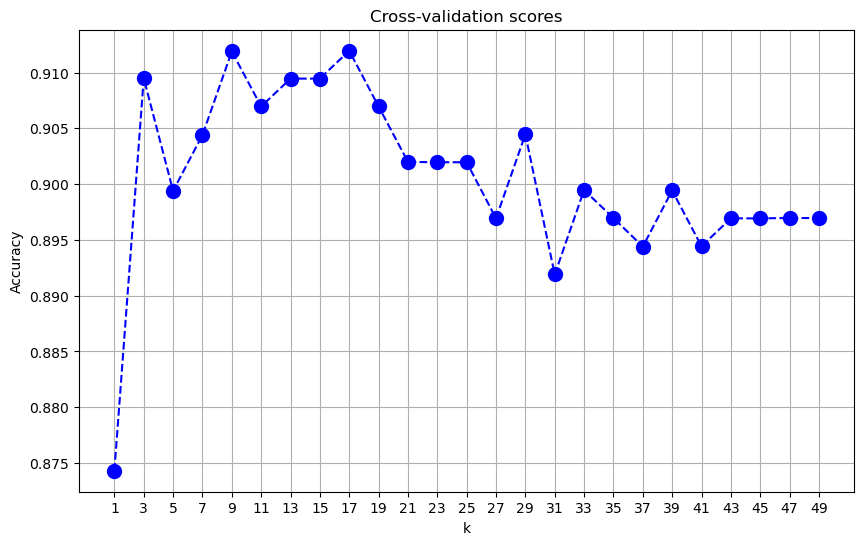

Test set accuracy with best k (17): 0.8771929824561403


In [82]:
from sklearn.model_selection import GridSearchCV

k_values = np.arange(1, 51, 2)  

param_grid = {'n_neighbors': k_values}
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best k value:", grid_search.best_params_['n_neighbors'])
print("Best cross-validation accuracy:", grid_search.best_score_)

cv_scores = grid_search.cv_results_['mean_test_score']
plt.figure(figsize=(10, 6))
plt.plot(k_values, cv_scores, marker='o', linestyle='dashed', color='b', markersize=10)
plt.title('Cross-validation scores')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()

best_k = grid_search.best_params_['n_neighbors']
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train, y_train)
test_accuracy = knn_best.score(X_test, y_test)
print(f"Test set accuracy with best k ({best_k}): {test_accuracy}")

In [83]:
k = 17
model_5 = KNeighborsClassifier(n_neighbors=k)
model_5.fit(X_train, y_train)
y_pred_5 = model_5.predict(X_test)

In [84]:
cm_5=confusion_matrix(y_test,y_pred_5)
cm_5

array([[104,  11],
       [ 10,  46]])

In [85]:
accuracy_5 = accuracy_score(y_test, y_pred_5)
accuracy_5

0.8771929824561403

In [86]:
precision_5 = precision_score(y_test, y_pred_5)
precision_5

0.8070175438596491

In [87]:
f1_5 = f1_score(y_test, y_pred_5)
f1_5

0.8141592920353982

In [88]:
recall_5 = recall_score(y_test, y_pred_5)
recall_5

0.8214285714285714

In [89]:
scores['K-NN'] = [f1_5, precision_5, accuracy_5, recall_5]

In [90]:
scores.head()

,Logistic_Regression,Decision Trees,Random Forest,SVM,K-NN
f1_score,0.929825,0.844037,0.909091,0.810811,0.814159
Precision,0.913793,0.867925,0.925926,0.818182,0.807018
Accuracy,0.953216,0.900585,0.941520,0.877193,0.877193
recall,0.946429,0.821429,0.892857,0.803571,0.821429


## 6. Naive Bayes

In [92]:
model_6 = GaussianNB()
model_6.fit(X_train, y_train)
y_pred_6 = model_6.predict(X_test)

In [93]:
cm_6=confusion_matrix(y_test,y_pred_6)
cm_6

array([[113,   2],
       [  7,  49]])

In [94]:
accuracy_6 = accuracy_score(y_test, y_pred_6)
accuracy_6

0.9473684210526315

In [95]:
precision_6 = precision_score(y_test, y_pred_6)
precision_6

0.9607843137254902

In [96]:
f1_6 = f1_score(y_test, y_pred_6)
f1_6

0.9158878504672897

In [97]:
recall_6 = recall_score(y_test, y_pred_6)
recall_6

0.875

In [98]:
scores['Naive Bayes'] = [f1_6, precision_6, accuracy_6, recall_6]

In [99]:
scores.head()

,Logistic_Regression,Decision Trees,Random Forest,SVM,K-NN,Naive Bayes
f1_score,0.929825,0.844037,0.909091,0.810811,0.814159,0.915888
Precision,0.913793,0.867925,0.925926,0.818182,0.807018,0.960784
Accuracy,0.953216,0.900585,0.941520,0.877193,0.877193,0.947368
recall,0.946429,0.821429,0.892857,0.803571,0.821429,0.875000


## 7. GBM (Gradient Boosting Machines)

In [101]:
model_7 = GradientBoostingClassifier(n_estimators=1000, max_depth=18, learning_rate=0.05, random_state=40)
model_7.fit(X_train, y_train)
y_pred_7 = model_7.predict(X_test)

In [102]:
cm_7=confusion_matrix(y_test,y_pred_7)
cm_7

array([[110,   5],
       [  6,  50]])

In [103]:
accuracy_7 = accuracy_score(y_test, y_pred_7)
accuracy_7

0.935672514619883

In [104]:
precision_7 = precision_score(y_test, y_pred_7)
precision_7

0.9090909090909091

In [105]:
f1_7 = f1_score(y_test, y_pred_7)
f1_7

0.9009009009009009

In [106]:
recall_7 = recall_score(y_test, y_pred_7)
recall_7

0.8928571428571429

In [172]:
scores['GBM'] = [f1_7, precision_7, accuracy_7, recall_7]

In [174]:
scores.head()

,Logistic_Regression,Decision Trees,Random Forest,SVM,K-NN,Naive Bayes,GBM
f1_score,0.929825,0.844037,0.909091,0.810811,0.814159,0.915888,0.900901
Precision,0.913793,0.867925,0.925926,0.818182,0.807018,0.960784,0.909091
Accuracy,0.953216,0.900585,0.941520,0.877193,0.877193,0.947368,0.935673
recall,0.946429,0.821429,0.892857,0.803571,0.821429,0.875000,0.892857


## Conclusion:

- If we prioritize balanced performance across precision, recall, and f1_score, Logistic Regression, Random Forest, and Naive Bayes are strong candidates.
- GBM is also effective, particularly in scenarios where high precision is desired.
- SVM and K-NN may require further tuning or consideration of alternative models based on specific use case requirements.

## In the context of medical diagnosis, minimizing false negatives (where a positive condition is incorrectly predicted as negative) is paramount. Therefore, prioritizing the recall score is crucial as it reflects the model's capability to reduce false negatives. Consequently, among the seven models assessed, Linear Regression emerges as the most favorable choice.